# Bootstrap Confidence Intervals

CBE 20258. Numerical and Statistical Analysis. Spring 2020.

&#169; University of Notre Dame

In [1]:
# load libraries
import scipy.stats as stats
import numpy as np
import scipy.optimize as optimize
import math
import matplotlib.pyplot as plt

## Bootstrap Confidence Intervals

**Futher Reading**: §5.10 and §6.15 in Navidi (2015)

### Motivating Example: Catalyst Lifetime 

In [2]:
# declare data in a list
lifetime = [3.2, 6.8, 4.2, 9.2, 11.2, 3.7, 2.9, 12.6, 6.4, 7.5, 8.6,
            4.5, 3.0, 9.6, 1.5, 4.5, 6.3, 7.2, 8.5, 4.2, 6.3, 3.2, 5.0, 4.9, 6.6]

# number of observations
n = len(lifetime)

# calculate sample mean and standard deviation
xbar = np.mean(lifetime)
s = np.std(lifetime)

# two ways to round
print("Lifetime Average:",round(xbar,2)," hours")
print("Lifetime Standard Deviation: {:.2f} hours".format(s))

# calculate zstar
zstar95 = stats.norm.interval(0.95)
print("\nz-star for two-sided 95% interval:",zstar95)

Lifetime Average: 6.06  hours
Lifetime Standard Deviation: 2.72 hours

z-star for two-sided 95% interval: (-1.959963984540054, 1.959963984540054)


### Traditional Confidence Intervals

#### z-interval

$$
\bar{x} \pm z^* \frac{s}{\sqrt{n}}
$$

where the sample standard deviation $s$ is used to approximate the population standard deviation $\sigma$.

In [3]:
# z-interval
# calculate zstar
zstar95 = np.array(stats.norm.interval(0.95))
print("\nz-star for two-sided 95% interval:",zstar95)

# calculate confidence interval
print("95% z confidence interval: ",xbar + (s/np.sqrt(n))*zstar95," hours")


z-star for two-sided 95% interval: [-1.95996398  1.95996398]
95% z confidence interval:  [4.99836313 7.12963687]  hours


#### t-interval

$$
\bar{x} \pm t^* \frac{s}{\sqrt{n}}
$$

In [4]:
# t-interval
# calculate tstar
tstar95 = np.array(stats.t.interval(0.95,n-1))
print("\nt-star for two-sided 95% interval:",tstar95)

# calculate confidence interval
print("95% t confidence interval: ",xbar + (s/np.sqrt(n))*tstar95," hours")


t-star for two-sided 95% interval: [-2.06389856  2.06389856]
95% t confidence interval:  [4.94185366 7.18614634]  hours


### Basic Bootstrap with Replacement

**Main Idea**
1. Specify sample size $n$ and number of times to simulate $m$
2. For each of $m$ simulations:
 * Choose $n$ items, with replacement, from the sample
 * Calculate the mean (or another statistic)
3. Create a histogram
4. Compute percentiles and construct confidence interval

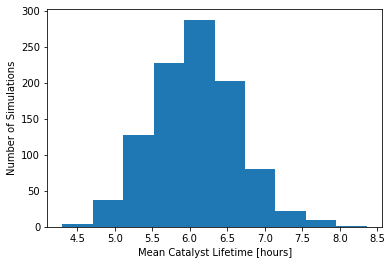

In [5]:
n_samp = len(lifetime)
m_sim = 1000

xbar_boot = np.zeros(m_sim)

for i in range(m_sim):
    
    # sample with replacement
    sample = np.random.choice(lifetime, size=n_samp, replace=True)
    
    # calculate bootstrap sample mean
    xbar_boot[i] = np.mean(sample)
    
# plot histogram
plt.hist(xbar_boot)
plt.xlabel("Mean Catalyst Lifetime [hours]")
plt.ylabel("Number of Simulations")
plt.show()

We can also create an empirical cumulative distribution of the bootstrap sample mean.

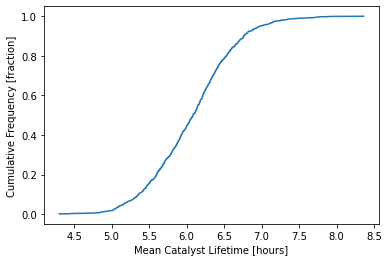

In [6]:
plt.plot(np.sort(xbar_boot),np.linspace(1/m_sim,1.0,m_sim))
plt.xlabel("Mean Catalyst Lifetime [hours]")
plt.ylabel("Cumulative Frequency [fraction]")
plt.show()

To calculate a two-sided 95% confidence interval, we just need to look up the 2.5% and 97.5% of the boot sample means:

In [7]:
ci_low = np.percentile(xbar_boot,2.5)
ci_high = np.percentile(xbar_boot,97.5)

# calculate confidence interval
print("95% bootstrap confidence interval: [",ci_low,", ",ci_high,"] hours")

95% bootstrap confidence interval: [ 5.039899999999999 ,  7.192299999999999 ] hours
